In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Swain vs. Alabama ##

**Context of the problem:** 

Amendment VI of the United States Constitution states that, “In all criminal prosecutions, the accused shall enjoy the right to a speedy and public trial, by an impartial jury of the State and district wherein the crime shall have been committed.”

One characteristic of an impartial jury is that it should be selected from a jury panel that is representative of the population of the relevant region. A jury panel is a group of people chosen to be prospective jurors. The final trial jury is selected from among them by deliberate inclusion or exclusion, and as a result can have any composition. **But the larger panel from which the trial jurors are drawn must be representative of the population.**

We consider the Supreme Court case of Robert Swain, a Black man convicted in Talladega County, Alabama, in 1962. He appealed his indictment all the way to the U.S. Supreme Court on the grounds that Black people were systematically excluded from juries in Talladega County. 

As part of his appeal, Robert Swain pointed out that all Talladega County jury panels for the past 10 years had contained only a small percent of Black panelists.

We will start by looking at the numerical details. 

- At the time of the trial, only men aged 21 or more were eligible to serve on juries in Talladega County. 
- In that population, 26% of the men were Black. 
- As is common in jury trials, the jurors in the trial of Robert Swain were selected from a panel of people who were supposed to be representative of the population of eligible jurors. 
- But only eight men among the jury panel of 100 men (that is, 8%) were Black.

The U.S. Supreme Court reviewed the appeal and concluded, “the overall percentage disparity has been small.” But was this assertion reasonable? If jury panelists were selected at random from the county’s eligible population, there would be some chance variation. We wouldn’t get exactly 26 Black panelists on every 100-person panel. But would we expect as few as eight?

Let us use our knowledge of Hypothesis testing to answer this question.

## Step 1: Setting up the null and alternative hypotheses for this application problem:

**The null hypothesis:** The panel was selected at random and ended up with a small number of Black panelists just due to chance.

**The alternative hypothesis:** The panel was NOT selected at random and there was some bias  associated with the selection of a small number of Black panelists.

## Step 2: Define The Test Statistic and Compute the Observed Value of the Test Statistic

The model says the panel was drawn at random from the eligible population. The alternative viewpoint is the case for Robert Swain, which is that the panel contained too few Black panelists to have been drawn at random. 

A natural statistic, then, is the number or count of Black panelists in the sample. Small values of the statistic will favor Robert Swain’s viewpoint.

In [2]:
observed_test_statistic = 8

## Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis

- We can simulate data based on the model. That is, we can simulate drawing at random from a population of whom 26% are Black.

- Our simulation will show what a panel would be like if it were selected at random.

- We can then compare the results of the simulation with the composition of an actual jury panel.

- If the results of our simulation are not consistent with the composition of the panel in the trial, that will be evidence against the model of random selection. Therefore, it will be evidence against the fairness of the trial.

In [3]:
# Specify the model proportions

population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [4]:
# We can simulate drawing at random from a population of whom 26% are Black. 
# Our simulation will show what a panel would be like if it were selected at random.

sample_size = 100
sample_proportions(sample_size, population_proportions).item(0) * sample_size

28.999999999999996

In [5]:
def panel_proportion():
    return sample_proportions(sample_size, population_proportions).item(0) * sample_size

In [6]:
panel_proportion()

28.999999999999996

In [7]:
# Repeat the simulation 10,000 times.

panels = make_array()

num_simulations = 10000

for i in np.arange(num_simulations):
    simulated_panel = panel_proportion()
    panels = np.append(panels, simulated_panel)

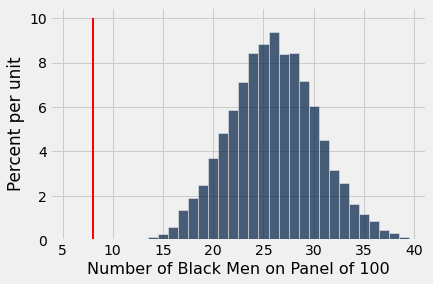

In [8]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))
plots.plot([8, 8], [0, .1], color='red', lw=2);

In [9]:
Black_men_on_panel = Table().with_column('Number of Black Men on Panel of 100', panels)

In [10]:
p_value = Black_men_on_panel.where('Number of Black Men on Panel of 100', are.below(9)).num_rows / num_simulations
p_value

0.0

In [11]:
min(panels)

11.0

## Step 4. The Conclusion of the Test

The graph above is a visual display of bias in the selection process. It shows that if we select a panel of size 100 at random from the eligible population, we are very unlikely to get counts of Black panelists that are as low as the eight that were observed on the panel in the trial.

When the data and a model are inconsistent, the model is hard to justify. After all, the data are real. The model is just a set of assumptions. When assumptions are at odds with reality, we must question those assumptions.

Also, because the p_value of 0.0 is lesser than 5%(0.05), we reject the null hypothesis in favor of the alternative hypothesis and conclude that the panel was NOT selected at random,

 In other words, the most reasonable conclusion is that the jury panel was not selected by random sampling from the population of eligible jurors. Notwithstanding the opinion of the Supreme Court, the difference between 26% and 8% is not so small as to be explained well by chance alone.

# Another example: An extension to Multiple Categories, with a twist! 

### Alameda County Jury Panels 

In 2010, the American Civil Liberties Union (ACLU) of Northern California presented a report on jury selection in Alameda County, California. The report concluded that certain racial and ethnic groups are underrepresented among jury panelists in Alameda County, and suggested some reforms of the process by which eligible jurors are assigned to panels. In this application example, we will analyze the data provided by the ACLU.

As you saw in the previous example, trial jurors are selected from a larger jury panel. By law, the jury panel is supposed to be representative of the population of eligible jurors. In California, the word “representative” is clearly defined as “selected at random.” Section 197 of California’s Code of Civil Procedure says, “All persons selected for jury service shall be selected at random, from a source or sources inclusive of a representative cross section of the population of the area served by the court.”

Here “selected for jury service” means being selected to be on the jury panel.

## Step 1: Setting up the null and alternative hypotheses for this application problem:

**The null hypothesis:** The panels were representative of the distribution provided for the eligible jurors.

**The alternative hypothesis:** The panels were NOT representative of the distribution provided for the eligible jurors.

In [12]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


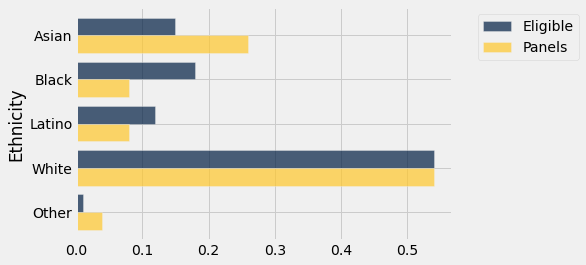

In [13]:
jury.barh('Ethnicity')

## Step 2: Define The Test Statistic and Compute the Observed Value of the Test Statistic

In order to decide between the two hypothesis, we must choose a statistic that we can use to make the decision. This is called the test statistic.

We will be comparing MORE THAN two categorical distributions. In such situations, **use the Total Variation Distance**.

## Total Variation Distance: Distance Between Distributions

In general, the total variation distance between two distributions measures how close the distributions are. The larger the TVD, the more different the two distributions appear.

In [14]:
def tvd(distribution_1, distribution_2):
    return sum(abs(distribution_1 - distribution_2))/2

We will use the total variation distance between distributions as the statistic to simulate under the assumption of random selection. 

- Large values of the distance will be evidence against random selection.

### Compute the Observed Value of the Test Statistic

In [15]:
jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


In [16]:
# In this case, we need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


In [17]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligible)

observed_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
observed_tvd

0.14000000000000001

## Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis

What if we select a random sample of 1,453 people from the population of eligible jurors? Will the distribution of their ethnicities look like the distribution of the panels above?

In [18]:
# The TVD of a model simluation from its expected values

alameda_sample_size = 1453
model_proportion = jury.column('Eligible')
simulated_distribution = sample_proportions(alameda_sample_size, model_proportion)


# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated_distribution)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.162423
Black,0.18,0.08,0.167928
Latino,0.12,0.08,0.11287
White,0.54,0.54,0.542326
Other,0.01,0.04,0.0144529


In [19]:
tvd(simulated_distribution, model_proportion)

0.01920165175498963

Technical note. Random samples of prospective jurors would be selected without replacement. However, when the size of a sample is small relative to the size of the population, sampling without replacement resembles sampling with replacement; the proportions in the population don’t change much between draws. The population of eligible jurors in Alameda County is over a million, and compared to that, a sample size of about 1500 is quite small. We will therefore sample with replacement.

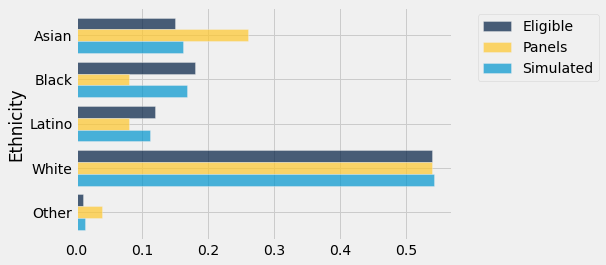

In [20]:
jury_with_simulated.barh('Ethnicity')

In [21]:
def simulated_tvd():
    simulated_distribution = sample_proportions(alameda_sample_size, model_proportion)
    return tvd(simulated_distribution, model_proportion)

In [22]:
tvds = make_array()

num_simulations = 10000

for i in np.arange(num_simulations):
    tvds = np.append(tvds, simulated_tvd())

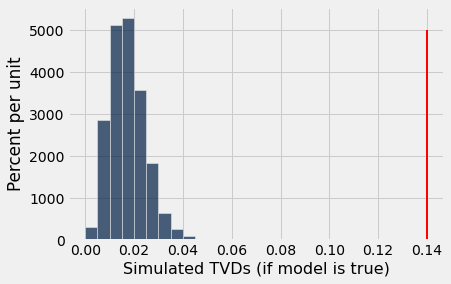

In [24]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
plots.plot([observed_tvd, observed_tvd], [0, 50], color='red', lw=2);